In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # matplotlib = 3.5.2
import networkx as nx # networkx = 2.8.4
# import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt
from utils import similarity_all



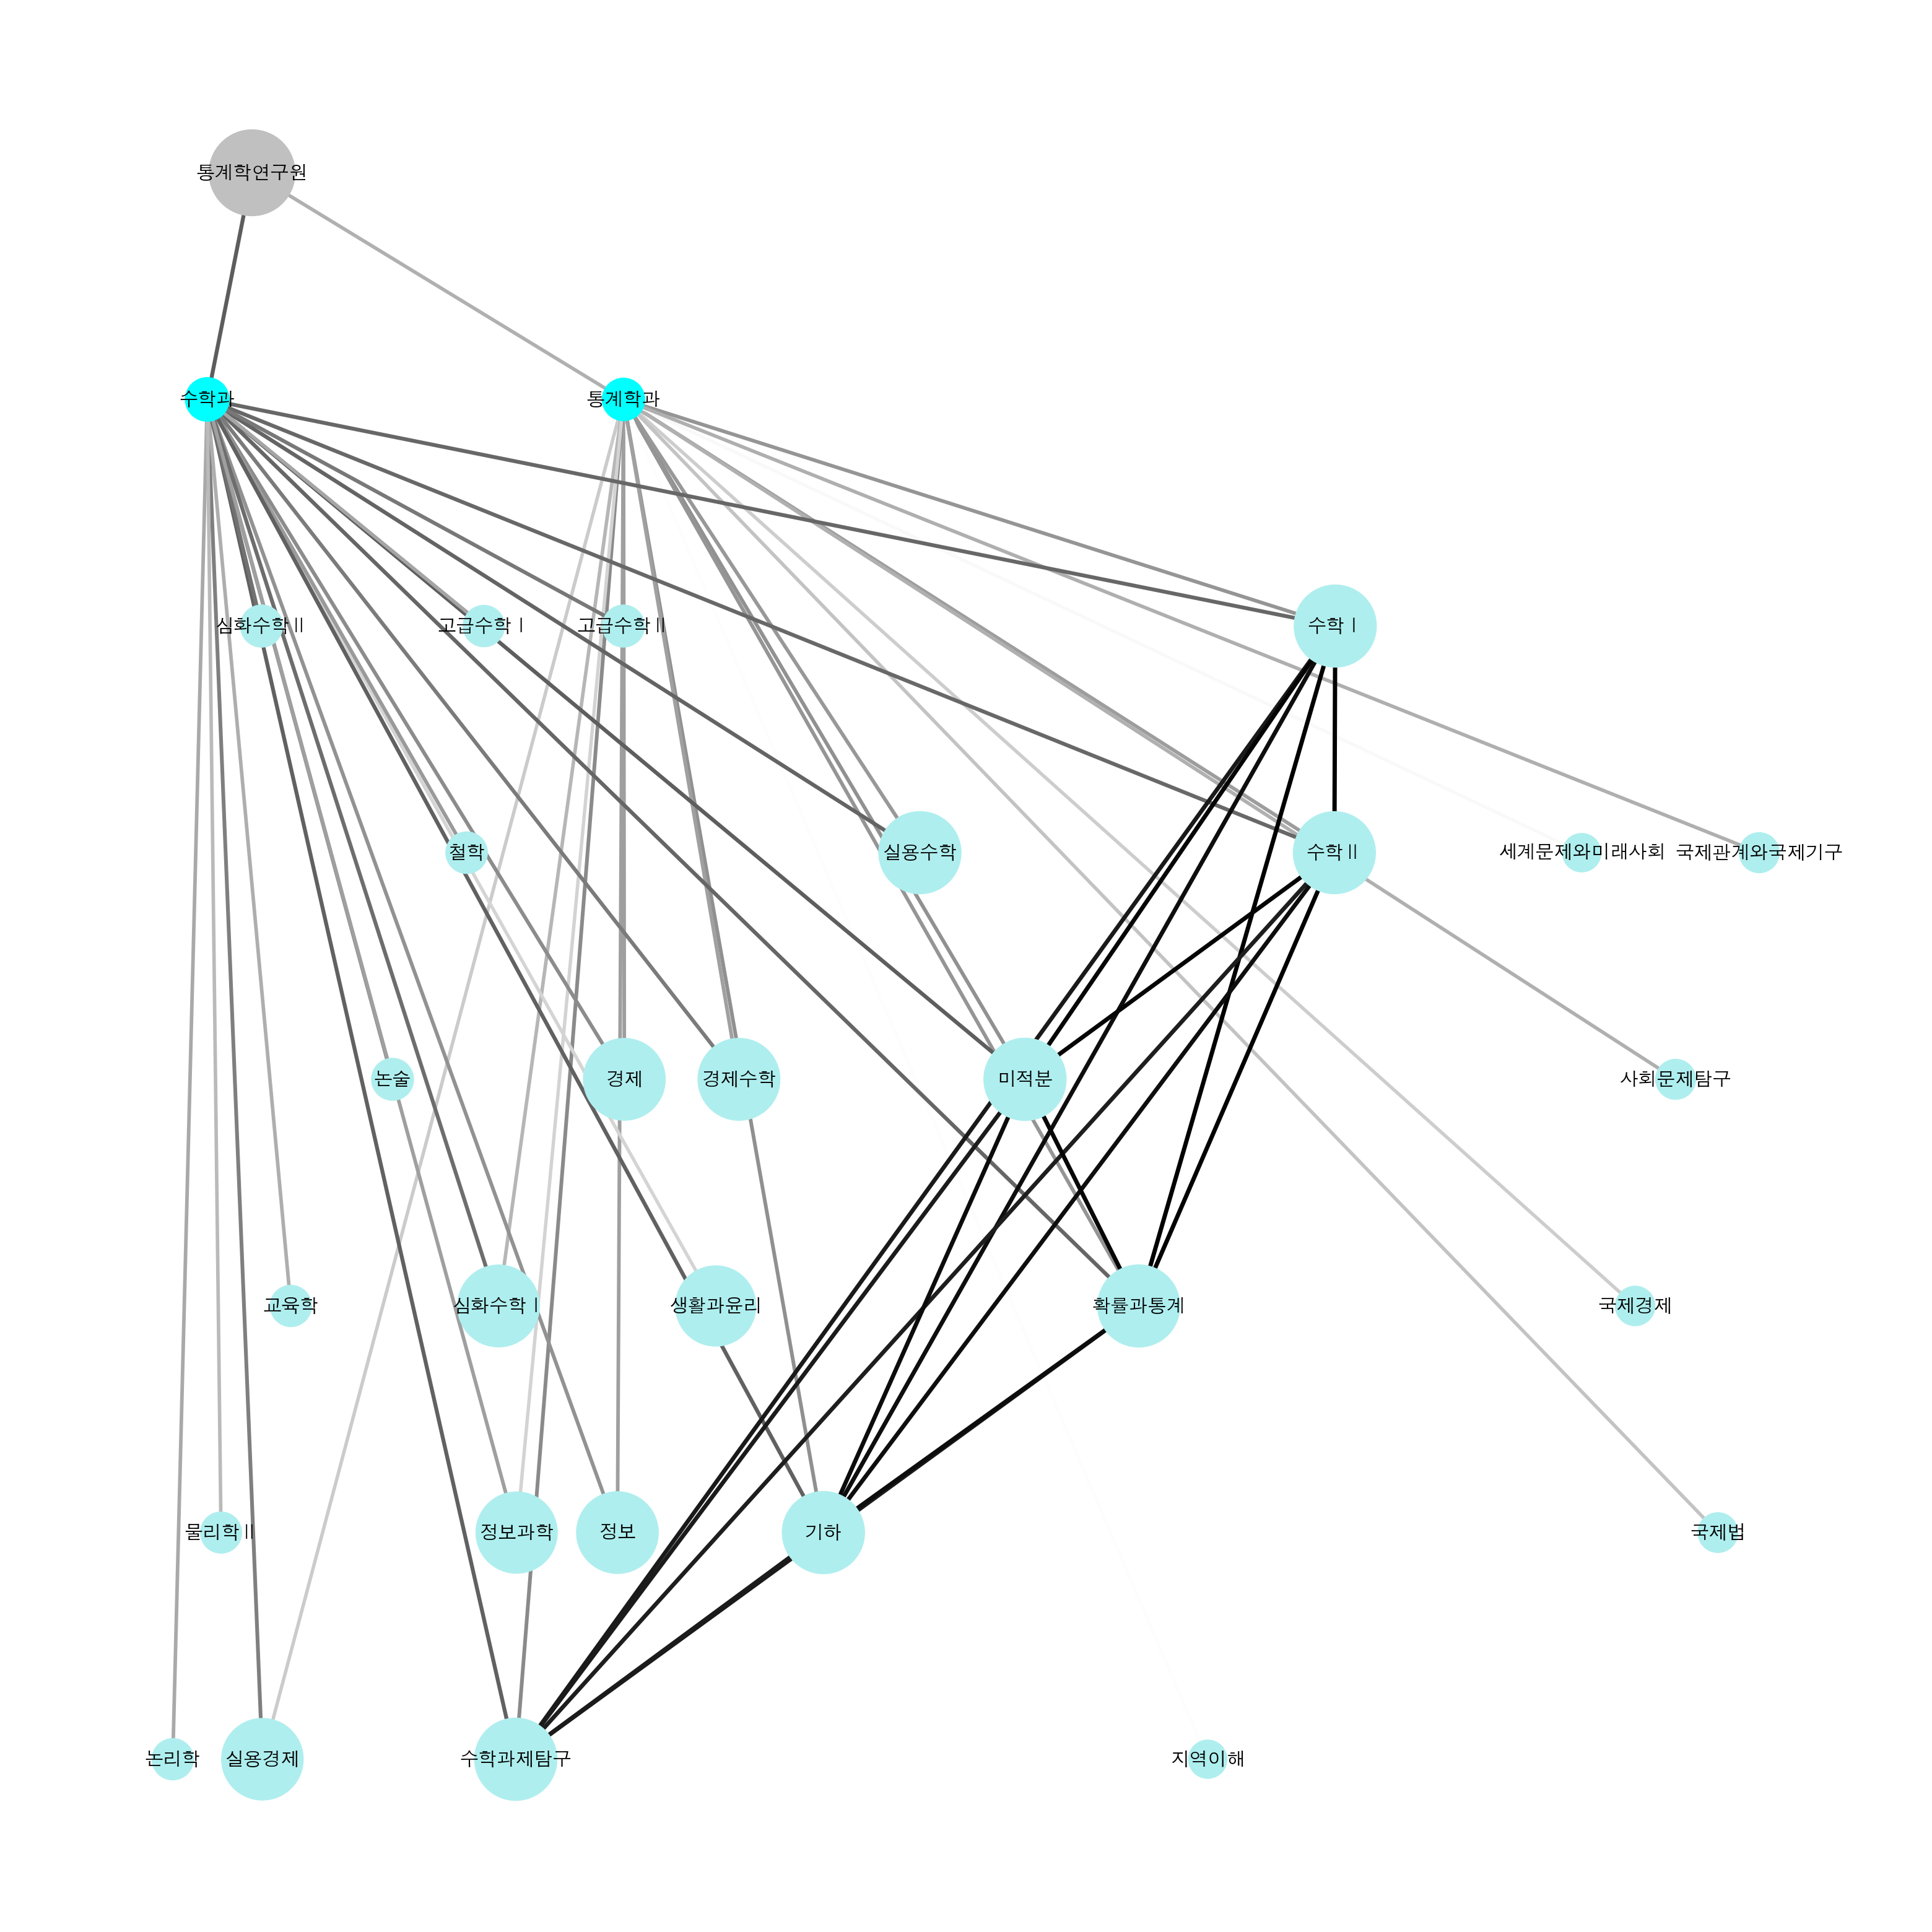

In [183]:
def minmax_scaler(x, scale =(0,1)):
    min, max = scale
    x = np.array(list(x))
    x_min = x.min()
    x_max = x.max()
    x = (x - x_min) / (x_max - x_min)
    x = x * (max-min) + min
    return x

def visualization(jobname, similarity_method = "tasttext",s2s_threshold =0.99, node_scale = (0,1), edge_scale = (0,1)):

    job_major_sim, major_subject_sim, job_subject_sim_1, job_subject_sim_2, subject_subject_sim = similarity_all(jobname, "fasttext", threshold_subject=0.99)

    majors = list(job_major_sim.keys())
    subjects = list(job_subject_sim_1.keys())
    subject_subject = list(subject_subject_sim.keys())
    majors_weight = list(job_major_sim.values())
    subject_subject = []
    job_major = []
    major_subject = []


    for idx in range(len(subject_subject_sim)):
        subject_subject.append((list(subject_subject_sim.keys())[idx][0], list(subject_subject_sim.keys())[idx][1], list(subject_subject_sim.values())[idx]))

    for idx in range(len(job_major_sim)):
        job_major.append((jobname, majors[idx], job_major_sim[majors[idx]]))
    
    for idx in range(len(major_subject_sim)):
        for subject in major_subject_sim[majors[idx]]:
            major_subject.append((majors[idx], subject, major_subject_sim[majors[idx]][subject]))


    g = nx.Graph()
    g.add_node(jobname, kind='job',weight = 2, color='silver')
    g.add_nodes_from([(node, {'weight': attr, 'kind':'major', 'color' :'cyan' }) for (node, attr) in job_major_sim.items()])
    g.add_nodes_from([(node, {'weight': attr, 'kind':'subject','color': 'paleturquoise'}) for (node, attr) in job_subject_sim_2.items()])

    # g.add_nodes_from(subjects, kind='subject', color='paleturquoise')
    g.add_weighted_edges_from(subject_subject, kind='subject-subject', color='silver')
    g.add_weighted_edges_from(major_subject, kind='major-subject', color='silver')
    g.add_weighted_edges_from(job_major, kind='job-major', color='silver')
    # for n in category_details_edge_list:
    #     g.add_edges_from(n, color='sandybrown')
    node_colors = nx.get_node_attributes(g, 'color').values()
    node_weight = nx.get_node_attributes(g, 'weight').values()
    edge_colors = nx.get_edge_attributes(g, 'color').values()
    edge_weight = nx.get_edge_attributes(g, 'weight').values()
    num_node = g.number_of_nodes() 

    # pos = nx.spectral_layout(g)
    pos = nx.nx_agraph.graphviz_layout(g, prog="dot")
    plt.figure(figsize=(g.number_of_nodes(), g.number_of_nodes()))

    if scale != None:
        node_weight = minmax_scaler(node_weight, scale=scale)
        edge_weight = minmax_scaler(edge_weight, scale=(0.7,1))


    nx.draw(g,
            pos=pos,
            with_labels=True,
            font_family='Applegothic',
            edge_color=edge_weight,
            node_color=node_colors,
            node_size = list(x*10000 for x in node_weight),
            font_size = num_node*0.7,
            width = list(x*5 for x in edge_weight),
            edge_cmap=plt.cm.Greys,
            # node_cmap=plt.cm.Purples,
            
    )

    return g

if __name__ == "__main__":
     aa = visualization(jobname = "통계학연구원", similarity_method = "fasttext",s2s_threshold =0.99, node_scale = (0,1), edge_scale = (0.5,1))
